
Giảng viên: Phạm Nguyễn Trường An

Thành viên nhóm:

1. Lê Nguyễn Minh Huy - 20521394
2. Lê Gia Khang - 21522189
3. Võ Huy Hoàng - 21522103
4. Phạm Thị Trâm Anh - 21520146

#Bài tập: Lấy dữ liệu của lớp và huấn luyện model.

Tài liệu tham khảo cho phần 2.1 (SVM):
- [SVM sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Tài liệu tham khảo phần 2.2 (DNN model):
- [Pretrained model](https://pytorch.org/vision/stable/models.html?fbclid=IwAR279rhX7BkOfdLpZvZ11H604fYVybkcFuzUKttLo-HN0zDYzL_hL6PkVUI)
- [Load data](https://pytorch.org/tutorials/recipes/recipes/loading_data_recipe.html)

- [Pytorch for Neural Network](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)
- [Schedule learning](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html)



# 1. Chạy code có sẵn từ sklearn

In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

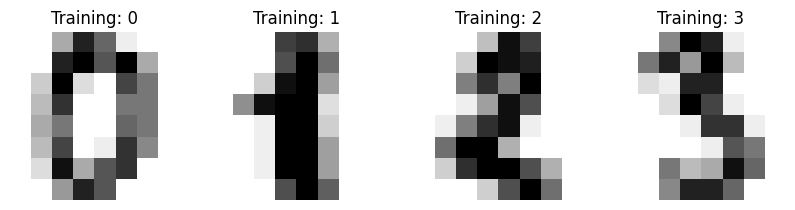

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

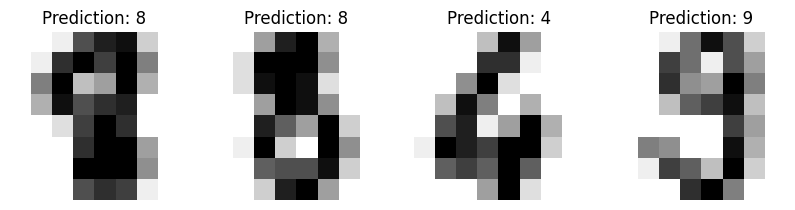

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


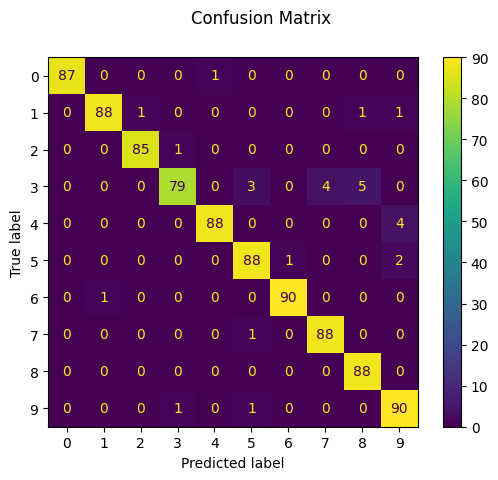

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Nhận xét:
- Số 3 thường hay bị nhầm sang số 5, 7 và 8.
- Số 4 thường hay bị nhầm sang số 0.

Nguyên nhân có thể là do những test đó là đặc biệt, có thể là số đó của một người nào đó viết mà chỉ có người đó mới hiểu.

# 2. Dùng Dataset của lớp để train model
folder: [Bộ dữ liệu của lớp](https://github.com/IrisPham74/HandWrittenCS117.git)

Vì model được huấn luyện trên bộ dữ liệu MNIST nên cần xử lý dữ liệu của nhóm sao cho tương đồng với MNIST.

Giới thiệu sơ qua MNIST:
- Training: 60,000 examples và Testing: 10,000 examples.
- grayscale.
- Có kích thước cố định.
- Có giá trị từ 0 - 9.

**Lấy dữ liệu từ Github**




In [ ]:
!git clone https://github.com/IrisPham74/HandWrittenCS117.git

Cloning into 'HandWrittenCS117'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 430 (delta 10), reused 21 (delta 7), pack-reused 404
Receiving objects: 100% (430/430), 105.90 MiB | 33.91 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (511/511), done.


In [ ]:
import os
import shutil

# Folder gốc
root_directory = "/content/HandWrittenCS117"

# Folder tạm chưa file .jpg, ,png
temp_folder = "/content/Data"

# Tạo folder tạm nếu nó chưa tồn tại
os.makedirs(temp_folder, exist_ok=True)

# Duyệt qua những file trong Folder gốc
for root, dirs, files in os.walk(root_directory):
    for file in files:
        # Kiểm tra xem những file .jpg, .png
        if file.lower().endswith(('.jpg','.png')):
            # Đường link file ảnh mình cần
            source_file = os.path.join(root, file)

            destination_folder = os.path.join(temp_folder, os.path.basename(root))
            os.makedirs(destination_folder, exist_ok=True)

            # Tạo đường dẫn mới
            destination_file = os.path.join(destination_folder, file)

            # Lưu dữ liệu đuôi .jpg, .png vào folder mới
            shutil.copy2(source_file, destination_file)


## 2.1. Model: SVM

### Chuẩn bị data

**Thư viện cần sử dụng**

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# Đường dẫn của folder ảnh gốc
folder_v1 = "/content/Data"

# Đường dẫn của folder ảnh đã xử lý
folder_v2 = "/content/Data(1)"

**B1:**

Chuyển đổi ảnh sang grayscale sau đó áp dụng thresholding để làm nổi bật các nét

Sau đó, lưu lại những ảnh đã xử lý vào folder "Data(2)"

In [ ]:
# Kiểm tra nếu folder digits_v2 chưa tồn tại thì tạo mới
if not os.path.exists(folder_v2):
    os.makedirs(folder_v2)

# Lặp qua từng folder con trong folder digits_v1
for folder_name in os.listdir(folder_v1):
    folder_path_v1 = os.path.join(folder_v1, folder_name)
    folder_path_v2 = os.path.join(folder_v2, folder_name)

    # Kiểm tra nếu folder con đã tồn tại trong folder digits_v2 thì bỏ qua
    if os.path.exists(folder_path_v2):
        continue

    # Tạo folder con trong folder digits_v2
    os.makedirs(folder_path_v2)

    # Lặp qua từng file ảnh trong folder con
    for file_name in os.listdir(folder_path_v1):
        if file_name.endswith(".jpg"):
          file_path_v1 = os.path.join(folder_path_v1, file_name)
          file_path_v2 = os.path.join(folder_path_v2, file_name)

          # Đọc ảnh từ folder digits_v1
          image = cv2.imread(file_path_v1)
          #cv2_imshow(image)

          # Chuyển đổi ảnh sang grayscale
          gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

          # Áp dụng thresholding để làm nổi bật các nét
          _, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

          # Lưu ảnh vào folder digits_v2
          cv2.imwrite(file_path_v2, thresholded)

**B2:**

Đọc dữ liệu từ folder_v2

In [ ]:
def read_data(folder_path, reverse_colors = False):
    data = []
    labels = []
    new_image_shape = (128, 128)
    for root, dirs, files in os.walk(folder_path):
        for dir_name in dirs:
            if dir_name.isdigit():
                label = int(dir_name)
                dir_listing = os.listdir(os.path.join(root, dir_name))
                for i in dir_listing:
                    file_path = os.path.join(root, dir_name, i)
                    image = Image.open(file_path).convert("L")

                    # Chuyển đổi màu: màu xám --> màu trắng, màu trắng --> màu xám
                    if reverse_colors:
                        image = Image.eval(image, lambda x: 255 - x)

                    image = image.resize(new_image_shape)
                    image_array = np.array(image)
                    image_scaled = image_array / 255.0 * 16.0
                    data.append(image_scaled)
                    labels.append(label)
    data = np.array(data)
    labels = np.array(labels)
    print("Kích thước dữ liệu:", data.shape)
    print("Kích thước nhãn:", labels.shape)
    return data, labels

In [ ]:
def show_img(data, labels):
    num_images = 5
    indices = np.random.choice(data.shape[0], num_images, replace=False)
    images = data[indices]
    label = labels[indices]
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {label[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
data, labels = read_data(folder_v2)

Kích thước dữ liệu: (510, 128, 128)
Kích thước nhãn: (510,)


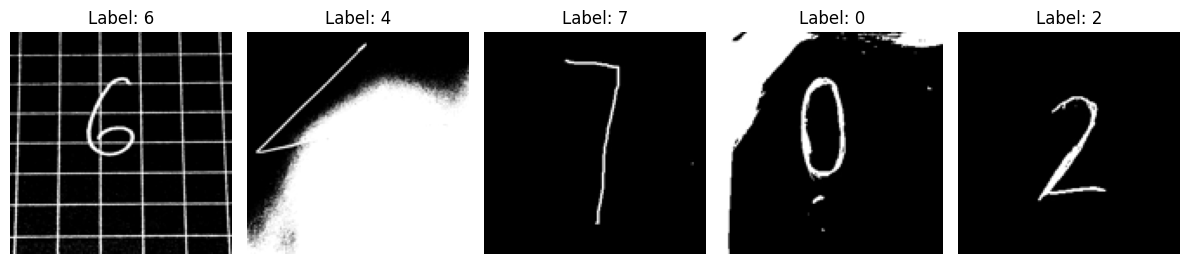

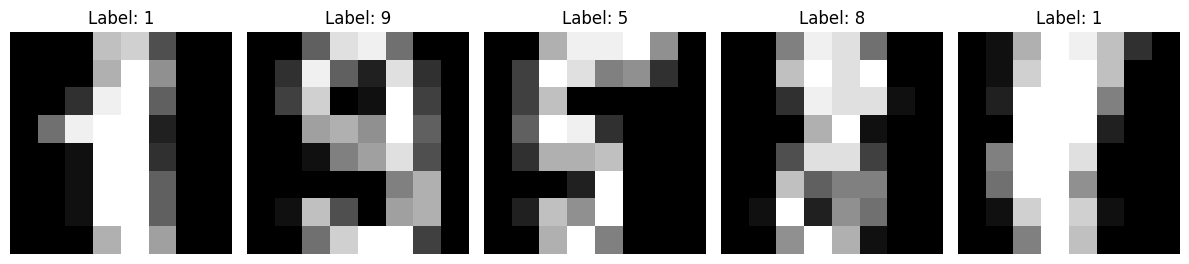

In [ ]:
digits = datasets.load_digits()

show_img(data, labels)
show_img(digits.images, digits.target)

**Nhận xét:** Bộ dữ liệu của lớp bị ảnh hưởng bởi phông nền, ánh sáng. Cho nên, sau khi xử lý, chữ số bị che, mờ hoặc thậm chí hòa vào phông nên. Khi huấn luyện, yếu tố nhiễu này chắc chắn tạo nên kết quả không tốt.

### Training

**Nhận xét:** Dữ liệu của nhóm và NMIST đã có sự giống nhau về màu sắc.

In [ ]:
# flatten the images
n_samples = len(data)
data = data.reshape((n_samples, -1))

In [ ]:
#split train and test
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, shuffle=True
)

Sử dụng grid search của OpenCV để tìm ra tham số phù hợp nhất cho model SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
def train_model(X_train, y_train):
  # Tạo các bộ tham số để tiến hành Grid Search
  param_grid = {
      'C': [0.1, 1, 10],
      'kernel': ['linear', 'rbf'],
  }

  svm_model = svm.SVC()
  grid_search = GridSearchCV(svm_model, param_grid, cv = 5, n_jobs = -1)
  grid_search.fit(X_train, y_train)

  # Lấy mô hình tốt nhất từ Grid Search
  best_model = grid_search.best_estimator_
  return best_model

In [ ]:
model = train_model(X_train, y_train)

### Predict

In [ ]:
predicted = model.predict(X_test)

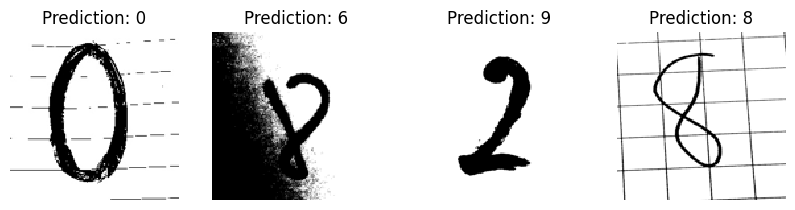

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(128, 128)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, predicted)
print("Accuracy score: ", acc)

Accuracy score:  0.6078431372549019


### Confusion Matrix

Confusion matrix:
[[ 7  0  0  2  1  0  1  1  0  1]
 [ 0 14  1  0  1  0  0  0  1  1]
 [ 2  0  6  1  0  0  1  0  0  1]
 [ 0  0  0  2  1  0  0  0  0  1]
 [ 1  0  0  0  8  0  1  0  0  0]
 [ 0  0  0  0  1  4  1  0  0  2]
 [ 0  1  0  2  0  1  3  1  1  0]
 [ 0  0  0  1  0  0  0  5  0  0]
 [ 1  1  0  0  1  0  1  0  7  2]
 [ 1  0  0  1  1  0  1  0  0  6]]


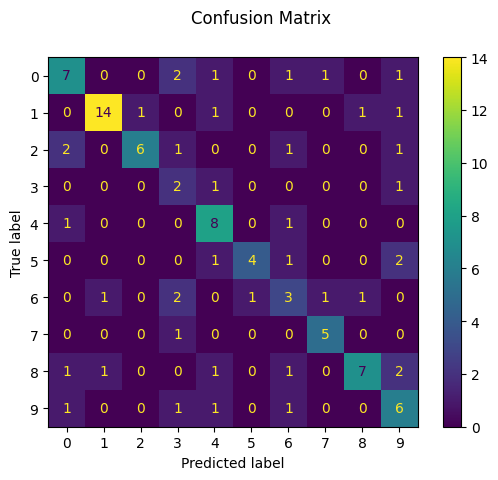

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## 2.2. Model: resnet50


In [ ]:
import torch
from torchvision import models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, ConcatDataset, DataLoader

In [ ]:
import torch.nn as nn
from sklearn.model_selection import train_test_split

### Preparing Data

In [ ]:
# Xử lý dữ liệu
transform = transforms.Compose([
        #transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        ])

In [ ]:
# Lưu dữ liệu sau khi xử lý
dataset = datasets.ImageFolder(root=temp_folder, transform=transform)

In [ ]:
len(dataset)

510

In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=46)

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=10, shuffle=False)

In [ ]:
img, label = next(iter(train_loader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([10, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([10])


### Pretrained model

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
resnet50(weights="IMAGENET1K_V2")
model = resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Freeze model parameters
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# Thay đổi lớp cuối để phù hợp bài toán Transfer Learning
fc_inputs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 224),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(224, 10),
    nn.LogSoftmax(dim = 1) # For using NLLLoss()
)

In [ ]:
# Sử dụng GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

### Training

Áp dụng kỹ thuật early stopping và learning rate scheduler

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler
import torch.optim as optim

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, verbose = True)

In [ ]:
epochs = 100
patience = 10
best_val_loss = float('inf')
total_step = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step(loss)

    if loss < best_val_loss:
        best_val_loss = loss
        counter = 0

    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break

    print('Epoch [{}/{}],  Loss: {:.4f}'.format(epoch+1, epochs,loss.item()))

Epoch [1/100],  Loss: 2.3157
Epoch [2/100],  Loss: 1.9348
Epoch [3/100],  Loss: 2.2929
Epoch [4/100],  Loss: 1.7858
Epoch [5/100],  Loss: 2.1983
Epoch [6/100],  Loss: 1.4309
Epoch [7/100],  Loss: 1.1370
Epoch [8/100],  Loss: 1.4890
Epoch [9/100],  Loss: 1.3612
Epoch [10/100],  Loss: 1.2681
Epoch [11/100],  Loss: 1.0970
Epoch [12/100],  Loss: 0.8926
Epoch [13/100],  Loss: 1.6051
Epoch [14/100],  Loss: 2.3216
Epoch [15/100],  Loss: 1.3932
Epoch [16/100],  Loss: 1.1274
Epoch [17/100],  Loss: 0.7612
Epoch [18/100],  Loss: 0.8727
Epoch [19/100],  Loss: 1.4046
Epoch [20/100],  Loss: 1.4672
Epoch [21/100],  Loss: 0.5030
Epoch [22/100],  Loss: 0.2991
Epoch [23/100],  Loss: 0.9217
Epoch [24/100],  Loss: 2.1887
Epoch [25/100],  Loss: 1.1562
Epoch [26/100],  Loss: 0.7582
Epoch [27/100],  Loss: 0.6152
Epoch 00028: reducing learning rate of group 0 to 1.0000e-04.
Epoch [28/100],  Loss: 1.5342
Epoch [29/100],  Loss: 0.4937
Epoch [30/100],  Loss: 0.8800
Epoch [31/100],  Loss: 1.3056
Early stopping!


### Confusion matrix

In [ ]:
from sklearn import  metrics
import matplotlib.pyplot as plt

In [ ]:
predict = []
true = []

In [ ]:
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predict.extend(predicted.tolist())
        true.extend(labels.tolist())

In [ ]:
print(
    f"Classification report for classifier\n"
    f"{metrics.classification_report(true, predict)}\n"
)

Classification report for classifier
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.82      0.90      0.86        10
           2       0.78      0.54      0.64        13
           3       0.60      0.75      0.67        12
           4       0.82      0.82      0.82        11
           5       0.50      0.44      0.47         9
           6       0.62      0.50      0.56        10
           7       0.60      0.75      0.67         8
           8       0.77      0.91      0.83        11
           9       0.86      0.55      0.67        11

    accuracy                           0.70       102
   macro avg       0.70      0.70      0.69       102
weighted avg       0.71      0.70      0.69       102




Confusion matrix:
[[ 6  0  0  0  0  0  1  0  0  0]
 [ 0  9  0  0  0  0  0  1  0  0]
 [ 0  0  7  2  1  0  2  0  1  0]
 [ 1  0  1  9  0  1  0  0  0  0]
 [ 0  0  0  0  9  0  0  2  0  0]
 [ 0  0  0  3  0  4  0  1  0  1]
 [ 1  1  0  0  0  2  5  0  1  0]
 [ 0  0  0  0  1  1  0  6  0  0]
 [ 1  0  0  0  0  0  0  0 10  0]
 [ 1  1  1  1  0  0  0  0  1  6]]


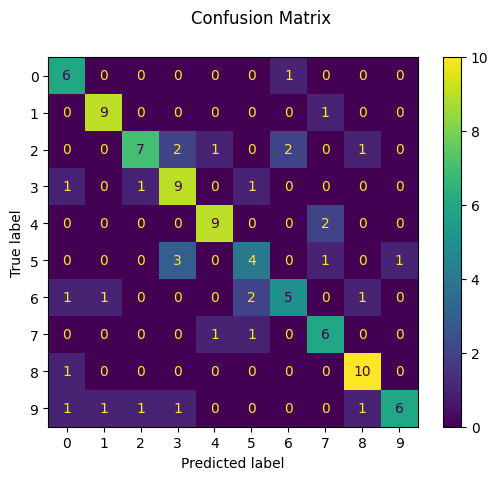

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(true, predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()